---
## **High Dimensional Test Dataset Creation - Paper Test Dataset Creation**
---

<font size="2">Eudald Sangenis  
Creation: 7/11/2022  
Last Update: 7/11/2022  

The objective of this file is to create the High Dimensional Dataset from the Test Dataset used in the IEEE 2022 Sensors Conference Paper.

Parameters High Dimensional Dataset:  
- 6 signals from the IMU  
- variable window size  

Once this dataset is created the next step is to predict the labels and verify the navigation solution.</font>

---
## **<font size="5">1. Libraries</font>**
---

In [10]:
import math
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import scipy.io as spio
import matplotlib.pyplot as plt

---
## **<font size="5">2. Functions:</font>**
---

In [11]:
# convert deg to radians
def deg_to_rad(dr):
    return (dr*math.pi)/180

# convert the .mat datsets to pandas datframe
def mat2pandas(file_name):
    mat = spio.loadmat(file_name +'.mat')
    mdata = mat['u'];  # variable in mat file
    mdata = np.transpose(mdata)
    # creating df object with columns specified    
    df = pd.DataFrame(mdata, columns = ['acc1','acc2','acc3',
                                        'gyro1','gyro2','gyro3',
                                        'na','timestamp','na2',
                                        'airPressure','samplePeriodS','magnetometer_x',
                                        'magnetometer_y','magnetometer_z','temperatureC',])
    df = df.drop(['na', 'na2','airPressure','samplePeriodS',
                  'magnetometer_x','magnetometer_y','magnetometer_z','temperatureC'], axis=1)
    # reorganize dataset to timestamp be the first column
    df = df[['timestamp','acc1','acc2','acc3','gyro1','gyro2','gyro3']]
    # convert from deg/min -> rad/min
    df['gyro1'] = deg_to_rad(df['gyro1'])
    df['gyro2'] = deg_to_rad(df['gyro2'])
    df['gyro3'] = deg_to_rad(df['gyro3'])
    return df

---
## **<font size="5">3. Data Handling</font>**
---

In [12]:
type_dataset = 'exp1200'
df_exp = type_dataset+'_VN'   # 2022_09_02: exp100_VN,exp200_VN,exp300_VN,exp400_VN,exp500_VN,exp600_VN
data_dataset = '2023_08_30'
num_signals = 6

# 6 signals
dataset_path_unlab = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\1_unlabeled_datasets\\'+data_dataset+'\\'
# save dataset path
dataset_save = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\4_6sig_SVM_Paper_Results\\datasets\\'+data_dataset+'\\'

In [13]:
df = (dataset_path_unlab+df_exp)

X = mat2pandas(df)
X.head(2)

,timestamp,acc1,acc2,acc3,gyro1,gyro2,gyro3
0,0.00000,0.000896,0.036741,-0.981648,0.008053,-0.008695,-0.019573
1,0.00125,-0.000570,0.037801,-0.977746,0.010301,-0.007298,-0.021228


In [14]:
print(X.shape)

(69558, 7)


In [15]:
c = ['timestamp']
X = X.drop(columns=c)
X.head(2)

,acc1,acc2,acc3,gyro1,gyro2,gyro3
0,0.000896,0.036741,-0.981648,0.008053,-0.008695,-0.019573
1,-0.000570,0.037801,-0.977746,0.010301,-0.007298,-0.021228


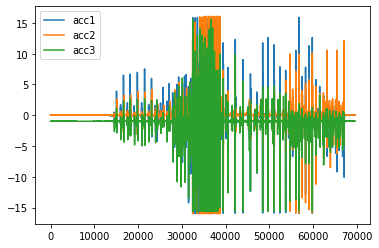

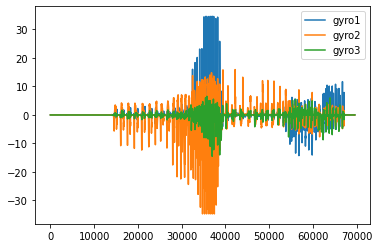

In [16]:
X.plot(y=['acc1','acc2','acc3'], use_index=True)
X.plot(y=['gyro1','gyro2','gyro3'], use_index=True)
plt.show()

Check if there are nan values:

In [17]:
X.isnull().values.any()

False

In [18]:
X.to_csv(dataset_save+str(num_signals)+'sig_'+type_dataset+'.csv', index=None, mode='a')